In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('hrdcrolling/preprocessing/final.csv', index_col = 0)
# df.drop('Unnamed: 0', axis=1, inplace=True)
display(df)

from matplotlib import font_manager, rc
font_path = "../data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

,과정명,학원명,기간,훈련비,정원,취업률,연령대,지역1,지역2,NCS,과정
0,보험사무원(GA총무)양성과정,인컴트랜드평생교육원,42,1161380,20,93.8,36.0,인천,부평구,03_금융보험,보험사무원
1,보험총무사무원,부천여성인력개발센터,40,1106080,20,64.3,34.0,경기,부천시,03_금융보험,보험사무원
2,보험사무원(GA총무)양성과정,인컴트랜드평생교육원,28,1161380,20,93.8,31.0,인천,부평구,03_금융보험,보험사무원
3,보험총무사무원양성,은평여성인력개발센터,40,1106080,18,54.3,36.0,서울,은평구,03_금융보험,보험사무원
4,보험사무원(GA총무)양성과정,인컴트랜드평생교육원,28,1161380,20,93.8,35.0,인천,부평구,03_금융보험,보험사무원
...,...,...,...,...,...,...,...,...,...,...,...
15985,애견미용사심화과정,동물농장애견미용학원,20,802440,12,50.0,NaN,부산,동래구,24_농림어업,애견미용사
15986,[탑강] 유기농업기능사 필기,한국이러닝협회,28,152770,500,20.0,NaN,서울,구로구,24_농림어업,유기농업기능사
15987,[탑강] 유기농업산업기사 필기,한국이러닝협회,49,186500,500,20.0,NaN,서울,구로구,24_농림어업,유기농업산업기사
15988,애견미용사 취업과정,프로펫애완동물관리학원,113,2697530,15,46.9,NaN,강원,원주시,24_농림어업,애견미용사


## 연령대별 취업률 높은 과정

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('hrdcrolling/preprocessing/final.csv', index_col = 0)

df1 = df.loc[:,['NCS', '취업률','과정','연령대']]

# def age_filter(data, age):
#     return 10 < data["연령대"].mean() < age
df1.dropna(subset=['연령대'], inplace=True)
df1 = df1.groupby(["NCS", "과정"]).mean()
df1 = df1.reset_index(level=['과정'])
df1.sort_values(by=['취업률'], ascending=False, inplace=True)
df1 = df1.loc[(df1.연령대 < 30) & (df1.연령대 >= 20), :]

display(df1)

n = int(round(len(df)/2))
df1 = df.head(n)
df2 = df.tail(n)

fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)

sns.barplot(x=df1.index, y='취업률', hue='과정', data=df1, palette='rocket', ax=ax1)
# sns.barplot(x=df2.index, y='취업률', data=df2, palette='rocket', ax=ax2)
plt.xticks(size=14, rotation=70)
plt.yticks(size=14)
plt.grid(True)
plt.ylim(20, 100)

plt.savefig("20대취업률.png")
plt.show()
plt.close()

,과정,취업률,연령대
NCS,,,
14_건설,건설플랜트,98.000000,25.000000
23_환경에너지안전,비파괴검사,80.000000,28.000000
05_법률경찰소방교도국방,법률취업,76.700000,29.909091
15_기계,금형,76.300000,27.000000
20_정보통신,보안전문가,75.142105,24.434211
20_정보통신,응용SW개발자,74.698039,26.235294
22_인쇄목재가구공예,디지털퍼블리셔,73.580000,24.200000
20_정보통신,융합SW개발자,73.446400,26.056000
23_환경에너지안전,수질분석가,73.400000,24.666667


In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('hrdcrolling/preprocessing/final.csv', index_col = 0)

NCS = [None,None,None]
NCS_list = df['NCS'].drop_duplicates().tolist()
for i in range(len(NCS_list)):
    NCS.append(NCS_list[i])

def c_name(NCS_number) :
    # df_course = df.loc(:, ['NCS'])
    grouped = df.groupby(['NCS','과정'])
    df_course = round(grouped.mean())
    df_course = df_course.dropna().astype(int)
    df_course.reset_index(level=['과정'], inplace=True)
    course = []
    course_list = df_course.loc[NCS[NCS_number]]['과정'].tolist()
    return course_list;

print(c_name(9))
# df = round(df.groupby(["NCS","과정"]).mean(), 0)

# df = df.loc[NCS[3]].sort_values(by=["취업률"], ascending=False)

# display(df)

['드론', '항공사지상직']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
df_c = df.loc[:,['NCS','취업률','과정','기간','훈련비','연령대']]
df_c.dropna(inplace=True)
grouped = df_c.groupby(['NCS','과정'])
df_c = round(grouped.mean(),0).astype(int)
df_c = df_c.loc[NCS[19]].sort_values(by=['훈련비'], ascending=True)

display(df_c)

# 구역 설정
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 1, 1)

# 그래프 그리기
sns.lineplot(x=df_c.index, y="취업률", data=df_c, palette="rocket", ax=ax1)
ax2 = plt.twinx()
sns.lineplot(x=df_c.index, y="기간", data=df_c, ls='--', color='red', ax=ax2)
plt.xticks(size=14, rotation=70)
plt.yticks(size=14)
plt.grid(True)
ax1.set_ylim(20, 100)
# ax2.set_ylim(10, 50)

# 출력 
plt.show()

## 과정별 취업률이 높은 학원

,지역1,취업률,정원,기간,훈련비,연령대,일일훈련비
학원명,,,,,,,
(주)미래인재개발원,대구,23,24,97,3854457,31,39737
서울IT직업전문학교,서울,27,20,78,2430090,31,31155
이음컴퓨터디자인학원,대구,28,10,78,1629510,25,20891
서울일러스트미술학원,대전,40,15,40,1495440,28,37386
윤성회계캐드컴퓨터학원,대구,40,15,50,1123800,23,22476
...,...,...,...,...,...,...,...
홍시디자인학원,서울,89,22,36,2628763,25,73021
그린컴퓨터아트학원,충북,90,20,95,4028690,25,42407
부산나래디자인학원,부산,92,20,85,3940867,26,46363


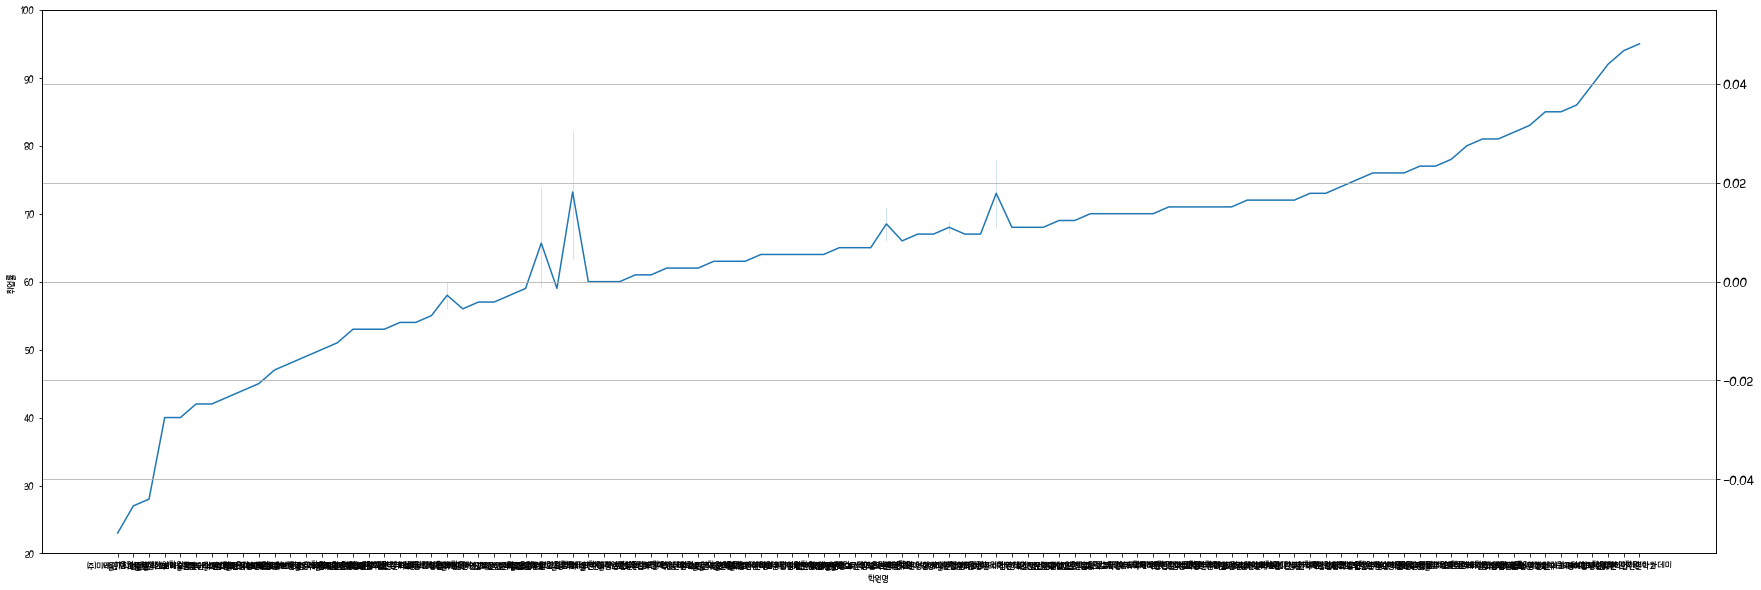

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
df_c = df.loc[:,['NCS','취업률','과정','정원','기간','훈련비','연령대','학원명','지역1']]
df_c.dropna(inplace=True)
grouped = df_c.groupby(['NCS','과정','학원명','지역1'])
df_c = round(grouped.mean(),0).astype(int)
# df_c = df_c.loc[NCS[7]].sort_values(by=['훈련비'], ascending=True)
df_c = df_c.loc[NCS[8]].sort_values(by='취업률', ascending=True)
df_c = df_c.loc['웹퍼블리셔'].sort_values(by='취업률', ascending=True)
df_c.reset_index(level=['지역1'], inplace=True)
df_c['일일훈련비'] = round(df_c['훈련비']/df_c['기간']).astype(int)
display(df_c)

# 구역 설정
fig = plt.figure(figsize=(30, 10))
ax1 = fig.add_subplot(1, 1, 1)

# 그래프 그리기
sns.lineplot(x=df_c.index, y="취업률", data=df_c, palette="rocket", ax=ax1)
ax2 = plt.twinx()
sns.lineplot(x=df_c.index, y="훈련비", data=df_c, ls='--', color='red', ax=ax2)
plt.xticks(size=14, rotation=70)
plt.yticks(size=14)
plt.grid(True)
ax1.set_ylim(20, 100)
# ax2.set_ylim(10, 50)

# 출력 
plt.show()

## 일일훈련비와 취업률

,취업률,정원,기간,훈련비,연령대
일일훈련비,,,,,
6만원초과,52,16,19,1351260,24


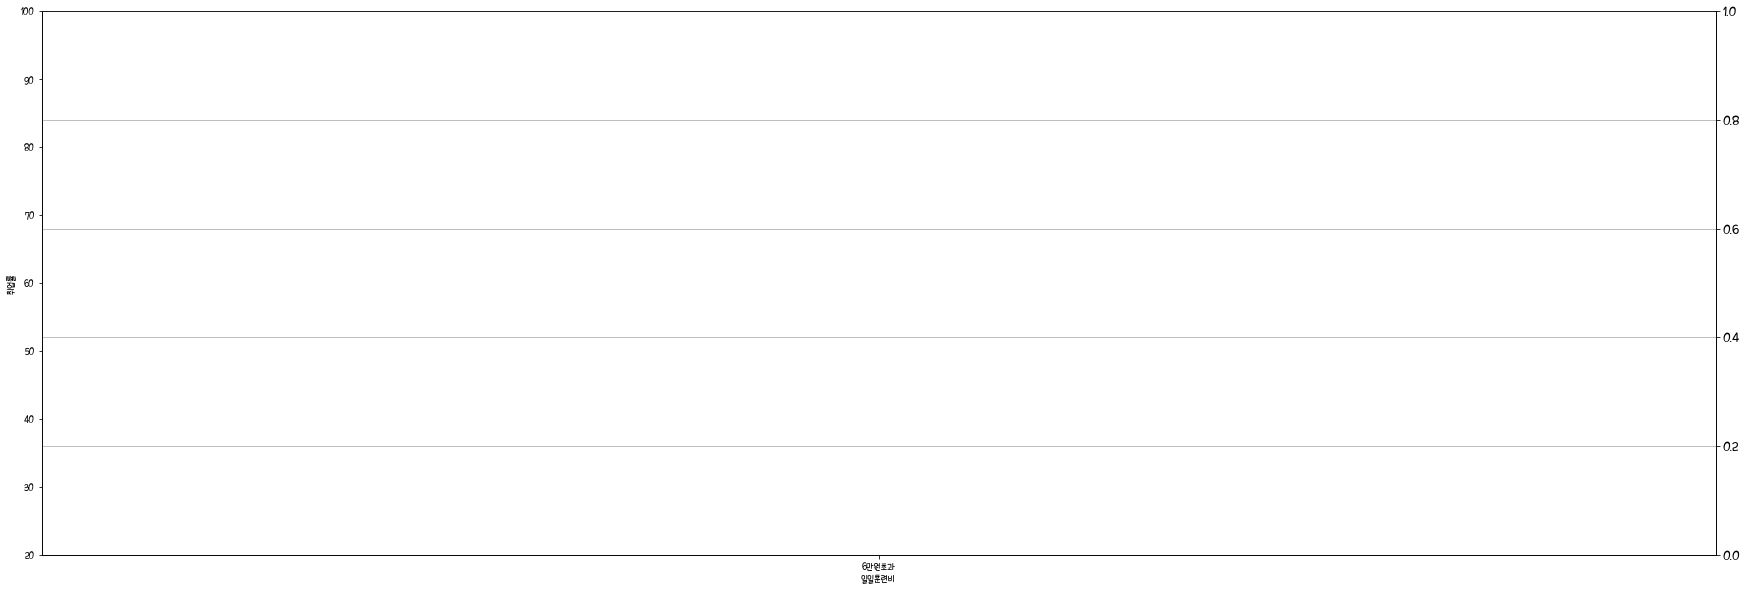

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
df_c = df.loc[:,['NCS','취업률','과정','정원','기간','훈련비','연령대','학원명','지역1']]
df_c.dropna(inplace=True)
grouped = df_c.groupby(['NCS','과정','학원명'])
df_c = round(grouped.mean(),0).astype(int)
# NCS변경
df_c = df_c.loc[NCS[9]].sort_values(by='취업률', ascending=True)

df_c['일일훈련비'] = round(df_c['훈련비']/df_c['기간'])
cost = df_c['일일훈련비']
cost_list = []
for i in range(len(cost)):
    if cost[i] <= 10000 :
        p = '1만원이하'
    elif 10000 < cost[i] <= 20000 :
        p = '2만원이하'
    elif 20000 < cost[i] <= 30000 :
        p = '3만원이하'
    elif 30000 < cost[i] <= 40000 :
        p = '4만원이하'
    elif 40000 < cost[i] <= 50000 :
        p = '5만원이하'
    elif 50000 < cost[i] <= 60000 :
        p = '6만원이하'
    else :
        p = '6만원초과'
    
    cost_list.append(p)
df_c['일일훈련비'] = cost_list

df_c = df_c.loc['항공사지상직']

grouped = df_c.groupby(['일일훈련비'])
df_c = grouped.mean().astype(int)

# df_c = df_c.loc['웹퍼블리셔']
# df_c.reset_index(level=['지역1'], inplace=True)

display(df_c)

# 구역 설정
fig = plt.figure(figsize=(30, 10))
ax1 = fig.add_subplot(1, 1, 1)

# 그래프 그리기
sns.lineplot(x=df_c.index, y="취업률", data=df_c, palette="rocket", ax=ax1)
ax2 = plt.twinx()
# sns.lineplot(x=df_c.index, y="일일훈련비", data=df_c, ls='--', color='red', ax=ax2)
plt.xticks(size=14, rotation=70)
plt.yticks(size=14)
plt.grid(True)
ax1.set_ylim(20, 100)
# ax2.set_ylim(10, 50)

# 출력 
plt.show()

KeyError: '법률취업'

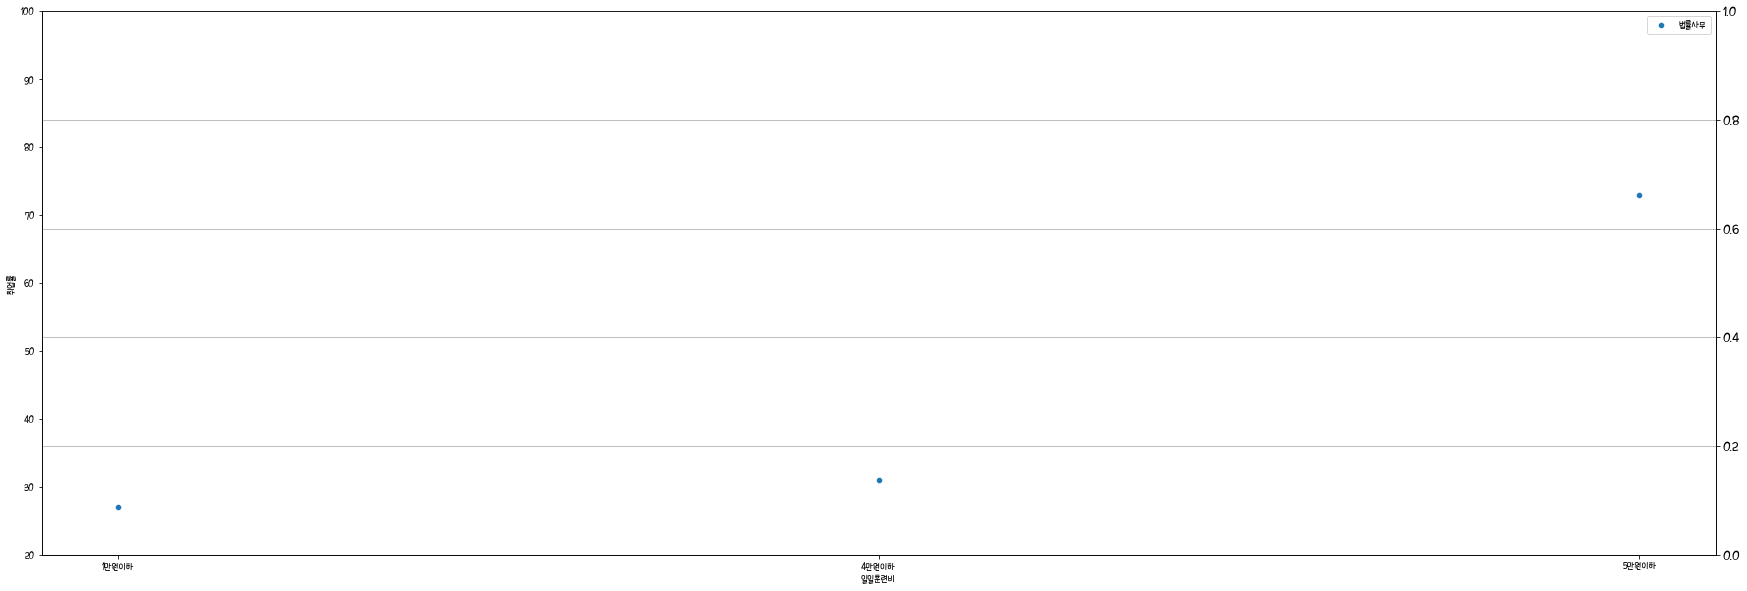

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
df_c = df.loc[:,['NCS','취업률','과정','정원','기간','훈련비','연령대','학원명','지역1']]
df_c.dropna(inplace=True)
grouped = df_c.groupby(['NCS','과정','학원명'])
df_c = round(grouped.mean(),0).astype(int)
df_c = df_c.loc[NCS[5]].sort_values(by='취업률', ascending=True)

df_c['일일훈련비'] = round(df_c['훈련비']/df_c['기간'])
cost = df_c['일일훈련비']
cost_list = []
for i in range(len(cost)):
    if cost[i] <= 10000 :
        p = '1만원이하'
    elif 10000 < cost[i] <= 20000 :
        p = '2만원이하'
    elif 20000 < cost[i] <= 30000 :
        p = '3만원이하'
    elif 30000 < cost[i] <= 40000 :
        p = '4만원이하'
    elif 40000 < cost[i] <= 50000 :
        p = '5만원이하'
    elif 50000 < cost[i] <= 60000 :
        p = '6만원이하'
    else :
        p = '6만원초과'
    
    cost_list.append(p)
df_c['일일훈련비'] = cost_list


c = c_name(5)
for i in range(len(c)):
    df_c = df_c.loc[c[i]]

    grouped = df_c.groupby(['일일훈련비'])
    df_c = grouped.mean().astype(int)

    # 구역 설정
    fig = plt.figure(figsize=(30, 10))
    ax1 = fig.add_subplot(1, 1, 1)

    # 그래프 그리기
    sns.scatterplot(x=df_c.index, y="취업률", data=df_c, palette="rocket", label= c[i], ax=ax1)
    ax2 = plt.twinx()
    # sns.lineplot(x=df_c.index, y="일일훈련비", data=df_c, ls='--', color='red', ax=ax2)
    plt.xticks(size=14, rotation=70)
    plt.yticks(size=14)
    plt.grid(True)
    ax1.set_ylim(20, 100)
    # ax2.set_ylim(10, 50)

# 출력 
plt.show()

,과정,지역1,취업률,정원,기간,훈련비,연령대,일일훈련비
학원명,,,,,,,,
멀티캠퍼스,빅데이터,서울,56,24,116,14859747,25,128101.0
스마트미디어인재개발원,빅데이터,광주,86,25,109,12104827,27,111053.0
비트교육센터,빅데이터,서울,72,25,122,9874187,26,80936.0
한국소프트웨어인재개발원,빅데이터,서울,86,28,130,8677920,26,66753.0
솔데스크강남학원,빅데이터,서울,65,25,92,5556060,28,60392.0
경영기술개발원교육센터주식회사,빅데이터,서울,56,30,125,7324000,28,58592.0
구디아카데미,빅데이터,서울,85,24,122,7123680,24,58391.0
케이아이씨캠퍼스학원,빅데이터,서울,57,30,95,5404320,26,56888.0
오라클자바교육학원,빅데이터,서울,82,30,96,5335580,31,55579.0


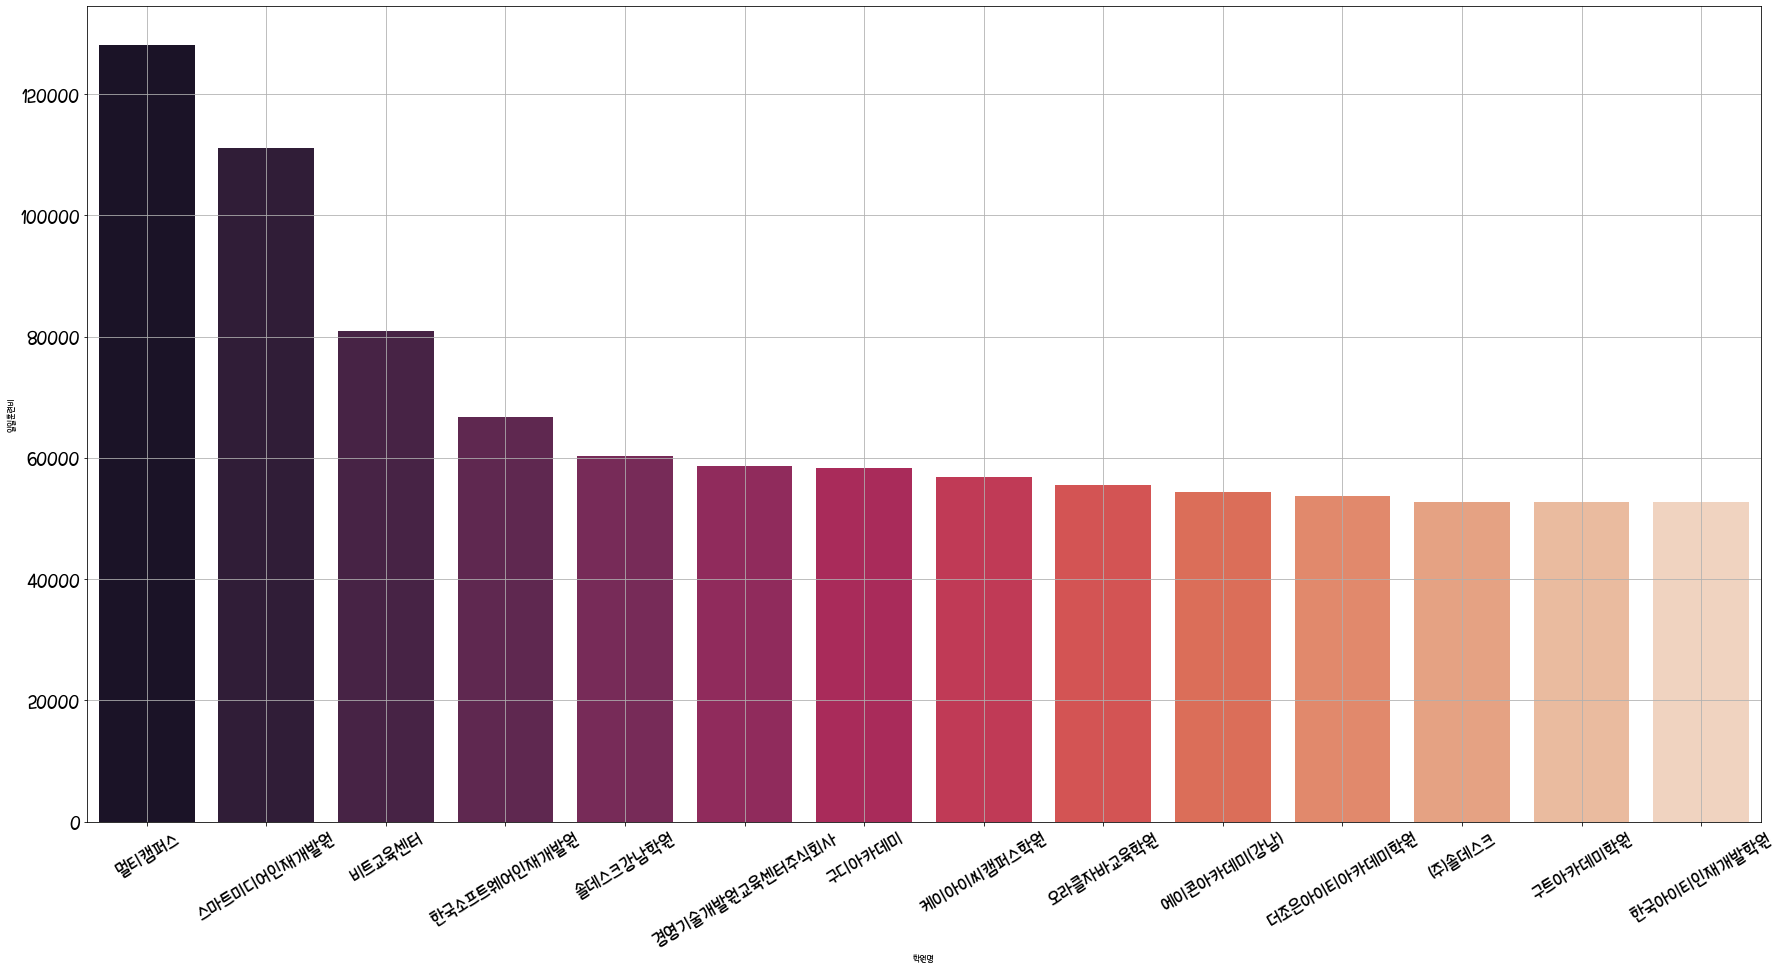

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
df_c = df.loc[:,['NCS','취업률','과정','정원','기간','훈련비','연령대','학원명','지역1']]
df_c.dropna(inplace=True)
grouped = df_c.groupby(['학원명', '과정', '지역1'])
df_c = round(grouped.mean(),0).astype(int)
df_c = df_c.reset_index(level=['과정','지역1'])

df_c['일일훈련비'] = round(df_c['훈련비']/df_c['기간'])
df_c.sort_values(by='일일훈련비',ascending=False , inplace=True)
big = df_c['과정'] == '빅데이터'
df_c = df_c[big]
display(df_c)
df_c = df_c.head(14)
# 그래프 그리기
fig = plt.figure(figsize=(30, 15))
ax1 = fig.add_subplot(1, 1, 1)
sns.barplot(x=df_c.index, y="일일훈련비", data=df_c, palette="rocket", ax=ax1)
plt.xticks(size=20, rotation=30)
plt.yticks(size=20)
plt.grid(True)

plt.savefig('output/빅데이터_일일훈련비_top14.png')
# 출력 
plt.show()